In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r"C:\Users\user\Downloads\Project\train.csv")

In [3]:
data

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0
...,...,...,...,...,...,...,...,...,...,...,...
245720,BPAWWXZN,Male,51,RG284,Self_Employed,X3,109,NaN,1925586,No,0
245721,HFNB7JY8,Male,27,RG268,Salaried,X1,15,No,862952,Yes,0
245722,GEHAUCWT,Female,26,RG281,Salaried,X1,13,No,670659,No,0
245723,GE7V8SAH,Female,28,RG273,Salaried,X1,31,No,407504,No,0


In [4]:
data = data.drop('ID',axis=1)

In [5]:
data.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [6]:
data.isna().sum()

Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

## Filling Missing Values

In [7]:
data['Credit_Product'].mode()

0    No
Name: Credit_Product, dtype: object

In [8]:
data['Credit_Product'] = data['Credit_Product'].fillna(data['Credit_Product'].mode().iloc[0])

In [9]:
data.isna().sum()

Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
Is_Lead                0
dtype: int64

In [10]:
data['Is_Lead'].unique()

array([0, 1], dtype=int64)

## Checking Outliers

Text(0.5, 1.0, 'Boxplot for Age')

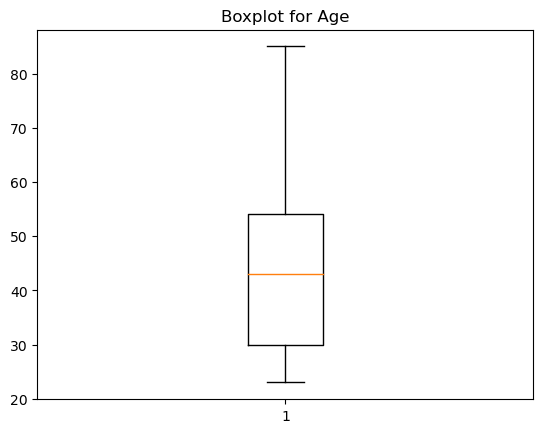

In [11]:
plt.boxplot(data['Age'])
plt.title('Boxplot for Age')

Text(0.5, 1.0, 'Boxplot for Vintage')

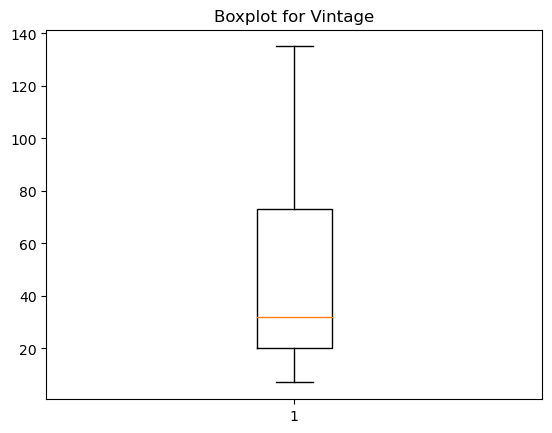

In [12]:
plt.boxplot(data['Vintage'])
plt.title('Boxplot for Vintage')

Text(0.5, 1.0, 'Boxplot for Avg_Account_Balance')

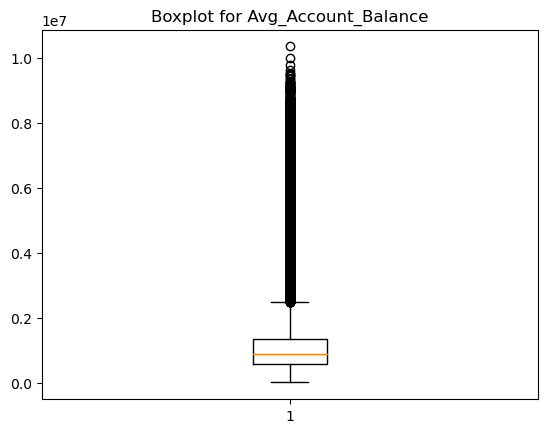

In [13]:
plt.boxplot(data['Avg_Account_Balance'])
plt.title('Boxplot for Avg_Account_Balance')

In [14]:
Q1= np.percentile(data['Avg_Account_Balance'],25)

In [15]:
Q1

604310.0

In [16]:
Q2= np.percentile(data['Avg_Account_Balance'],50)

In [17]:
Q2

894601.0

In [18]:
Q3= np.percentile(data['Avg_Account_Balance'],75)

In [19]:
Q3

1366666.0

In [20]:
IQR = Q3-Q1

In [21]:
IQR

762356.0

In [22]:
low_limit = Q1 - 1.5*IQR
upr_limit = Q3 + 1.5*IQR

In [23]:
low_limit

-539224.0

In [24]:
upr_limit

2510200.0

In [25]:
outlier=[]
for x in data['Avg_Account_Balance']:
    if x>upr_limit or x<low_limit:
        outlier.append(x)

In [26]:
outlier

[2521592,
 2824468,
 6278683,
 5878049,
 2952343,
 5950700,
 2601656,
 3949713,
 3123134,
 2729727,
 2555270,
 3850567,
 2944493,
 2933466,
 3831583,
 3540669,
 2561687,
 2872448,
 3800193,
 3051160,
 3278386,
 4125595,
 3005209,
 7880380,
 3195126,
 2768985,
 3449426,
 3646543,
 5857499,
 5182372,
 3969266,
 5273143,
 2983564,
 5752728,
 2772937,
 2938246,
 2544189,
 2790799,
 3768268,
 3929741,
 3287900,
 2919013,
 6588376,
 2563600,
 2826195,
 4067059,
 2741226,
 5420269,
 3459082,
 3879456,
 3578868,
 6722899,
 2662399,
 2845178,
 3407498,
 8256124,
 3441282,
 2612888,
 2777885,
 2772252,
 3413399,
 3798066,
 2618664,
 4425329,
 2756970,
 4419980,
 4793246,
 3148143,
 3116121,
 2862943,
 2602546,
 3440188,
 2727333,
 5026275,
 4948862,
 4818620,
 4210198,
 4022185,
 2818256,
 2857985,
 3649275,
 2708741,
 2720703,
 3907100,
 2730991,
 4597535,
 2689143,
 2629086,
 3820574,
 3296827,
 3033440,
 3940715,
 2574218,
 2696486,
 7414269,
 2948374,
 2724405,
 2934668,
 4433597,
 2984988,


In [27]:
ind1 = data['Avg_Account_Balance']>upr_limit
ind2= data['Avg_Account_Balance']<low_limit

In [28]:
data.loc[ind1].index

Int64Index([    35,     71,    113,    184,    205,    211,    214,    218,
               240,    262,
            ...
            245554, 245560, 245601, 245610, 245629, 245638, 245653, 245661,
            245676, 245701],
           dtype='int64', length=14612)

In [29]:
data.loc[ind2].index #no low outliers

Int64Index([], dtype='int64')

In [30]:
data[ind1]['Avg_Account_Balance']

35        2521592
71        2824468
113       6278683
184       5878049
205       2952343
           ...   
245638    5396737
245653    6900312
245661    3566719
245676    2769973
245701    9491986
Name: Avg_Account_Balance, Length: 14612, dtype: int64

In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])

In [32]:
le = LabelEncoder()
data['Is_Active'] = le.fit_transform(data['Is_Active'])

In [33]:
le = LabelEncoder()
data['Occupation'] = le.fit_transform(data['Occupation'])

In [34]:
le = LabelEncoder()
data['Channel_Code'] = le.fit_transform(data['Channel_Code'])

In [35]:
le = LabelEncoder()
data['Credit_Product'] = le.fit_transform(data['Credit_Product'])

In [36]:
data=pd.get_dummies(data,columns=['Region_Code'])

In [37]:
data

,Gender,Age,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Region_Code_RG250,...,Region_Code_RG275,Region_Code_RG276,Region_Code_RG277,Region_Code_RG278,Region_Code_RG279,Region_Code_RG280,Region_Code_RG281,Region_Code_RG282,Region_Code_RG283,Region_Code_RG284
0,0,73,1,2,43,0,1045696,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,30,2,0,32,0,581988,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,56,3,2,26,0,1484315,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,34,2,0,19,0,470454,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,30,2,0,33,0,886787,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245720,1,51,3,2,109,0,1925586,0,0,0,...,0,0,0,0,0,0,0,0,0,1
245721,1,27,2,0,15,0,862952,1,0,0,...,0,0,0,0,0,0,0,0,0,0
245722,0,26,2,0,13,0,670659,0,0,0,...,0,0,0,0,0,0,1,0,0,0
245723,0,28,2,0,31,0,407504,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
pd.set_option('display.max_rows',None)        #TO SHOW ALL OUTLIERS RATHER THAN HIDING IT 

In [39]:
data[ind1]['Avg_Account_Balance']    #TO DISPLAY

35         2521592
71         2824468
113        6278683
184        5878049
205        2952343
211        5950700
214        2601656
218        3949713
240        3123134
262        2729727
265        2555270
271        3850567
277        2944493
304        2933466
309        3831583
331        3540669
386        2561687
401        2872448
416        3800193
417        3051160
429        3278386
443        4125595
454        3005209
461        7880380
467        3195126
475        2768985
486        3449426
497        3646543
536        5857499
540        5182372
554        3969266
575        5273143
599        2983564
626        5752728
646        2772937
704        2938246
745        2544189
753        2790799
762        3768268
774        3929741
812        3287900
813        2919013
826        6588376
869        2563600
903        2826195
934        4067059
940        2741226
948        5420269
1009       3459082
1034       3879456
1065       3578868
1079       6722899
1087       2